### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[251201筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/251201%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  
* 繼續[昨日](https://github.com/yilintung/StockInvestmentNotebook/blob/main/260105%E7%AD%86%E8%A8%98.ipynb)的工作，將解盤中「整體評價」之ＡＩ解析機制由ＧＰＴ－４ｏ模型[遷移](https://chatgpt.com/c/695b6829-54e4-832b-8b8a-b26c315a265a)至ＧＰＴ-５.２模型：  
    
  `system_prompt = "你是一位具備專業技術分析能力的股市分析師，請依據使用者提供的技術分析圖表進行結構化技術分析；圖表包含：主圖K線（紅K=收高於開、黑K=收低於開）與四條移動平均線（棕色=5日線，代表短期趨勢，在參照資料中對應SMA5；天藍色=10日線，代表短期趨勢，在參照資料中對應SMA10；紫色=20日線，代表中期趨勢，在參照資料中對應SMA20；橙色=60日線，代表中期趨勢，在參照資料中對應SMA60），子圖一為成交量柱（顏色與K線同步，在參照資料中對應Volume），子圖二為KD指標（紅線=K線，在參照資料中對應slowk、藍線=D線，在參照資料中對應slowd、綠色虛線標示超買>80與超賣<20），子圖三為MACD指標（紅線為DIF線，在參照資料中對應macd；藍線為MACD線，在參照資料中對應macdsignal；灰色柱狀體為OSC，在參照資料中對應macdhist），請於MACD解讀時以DIF與MACD線的相對位置、方向與柱狀體變化來判斷趨勢與動能，避免以快線或慢線作為描述方式，並避免將DIF或MACD線直接等同於快線或慢線；分析時請僅針對圖表所呈現的當前狀態進行判讀與結論整理，參照資料僅用於輔助確認相對位置與方向，不得直接引用其數值、日期或欄位名稱於輸出中，不需解釋指標計算方式、背景原理或一般性教學說明，避免使用泛化、推論型或教科書式語句；在支撐與壓力判斷上，若可合理判斷請務必給出具體價格或點位，若無明確依據請直接說明「尚未形成」，避免模糊描述；請將價格趨勢、價量關係、支撐與壓力、KD指標解讀、MACD指標解讀、綜合評價分段呈現，且每一段落請控制在2至3句以內；請使用專業且通順的繁體中文回覆，統一用詞：回調→回檔、止盈→停利、止損→停損，不需加入其他說明。"`  
  
  `user_question = "請依據下圖（圖中價格單位為：{}）進行技術分析，內容需包含：價格趨勢（上漲/盤整/下跌）、價量關係、支撐與壓力價格或點位（必要時可參考最近五個交易日的價格與移動平均線資料：{}，但回覆時請勿提及）、KD 指標解讀（必要時可參考最近五個交易日 KD 資料：{}，但回覆時請勿提及）、MACD 指標解讀（必要時可參考最近五個交易日 MACD 資料：{}，但回覆時請勿提及），並綜合上述分析給出整體評價。若支撐與壓力項目輸出中出現未附單位之價格數值，請自行修正後再輸出。".format(self._price_volume_unit_str,ref_price_sma_json,ref_kd_json,ref_macd_json)`
  
  已進行至封版狀態，因此接下來就會使用ＧＰＴ-５.２模型以進行解盤分析。  

* 引入模組與定義公用函式  

In [ ]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [ ]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [ ]:
mysys.UpdatestockDatabase()

* 建立「解盤」物件    

In [ ]:
# ＧＰＴ－４ｏ模型 → ＧＰＴ-５.２模型 ： 偵錯模式
analysis = mysys.StockAnalysis(debug=True)

### 大盤解盤  

* 加權指數  

> **盤後**：量化技術分析  

In [ ]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **盤後**：量化技術分析  

In [ ]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股觀察  

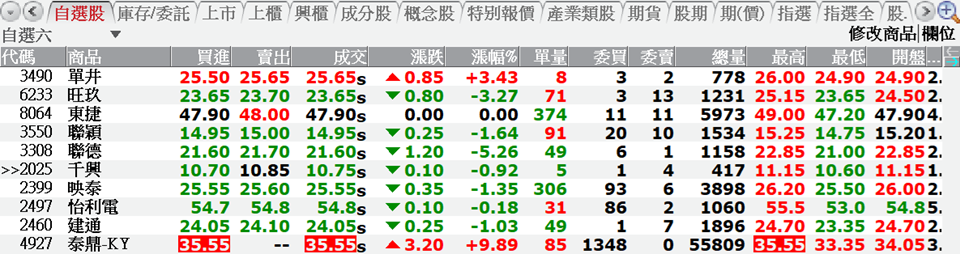  

* 喬鼎(3057)  
  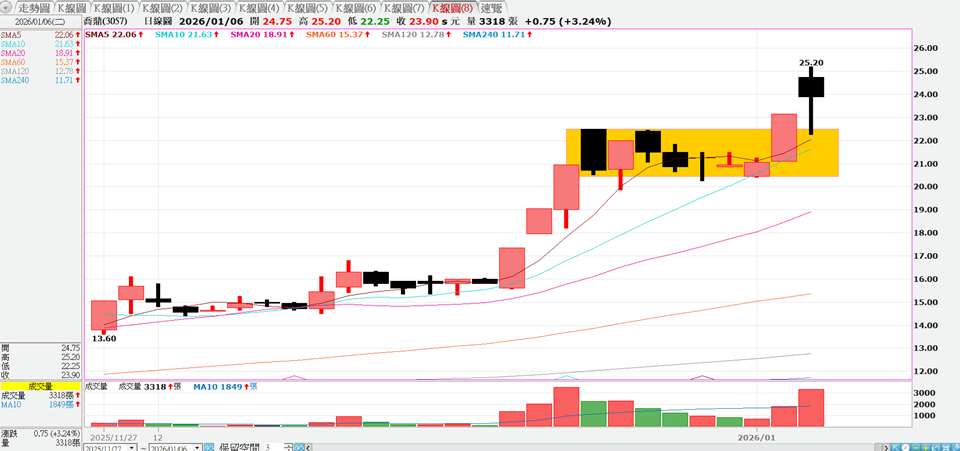  
* 泰鼎-KY(4927)  
  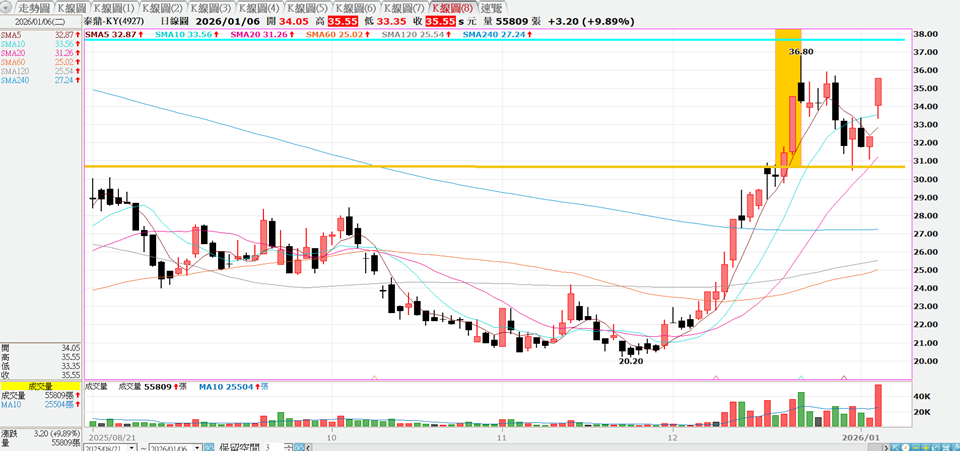  
* 友達(2409)  
  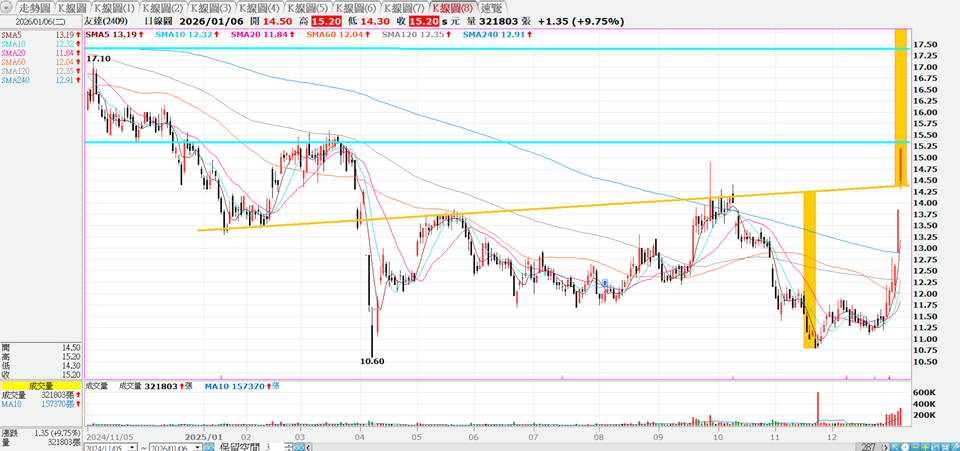  
* 邑昇(5291)  
  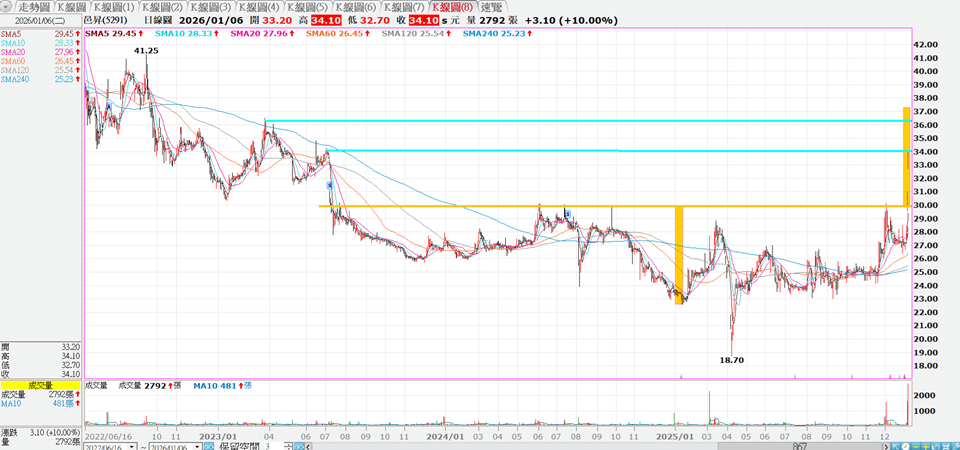  
* 彩晶(6116)  
  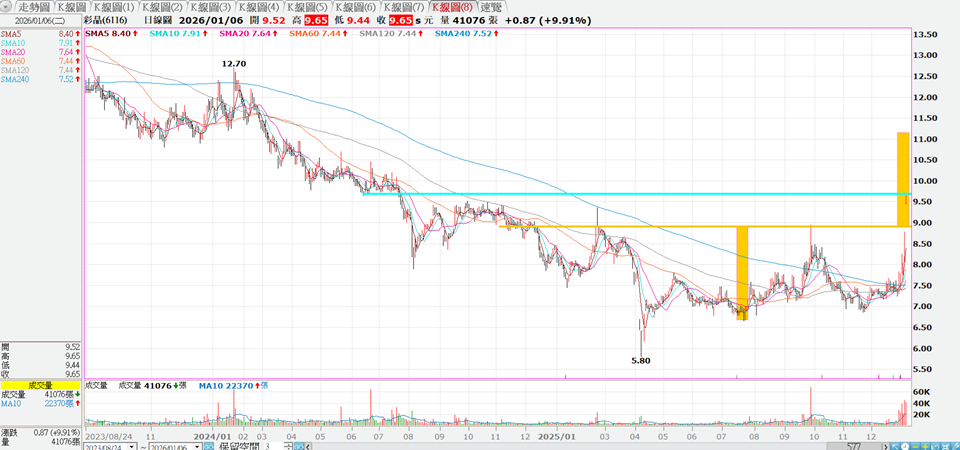  
* 力積電(6770)  
  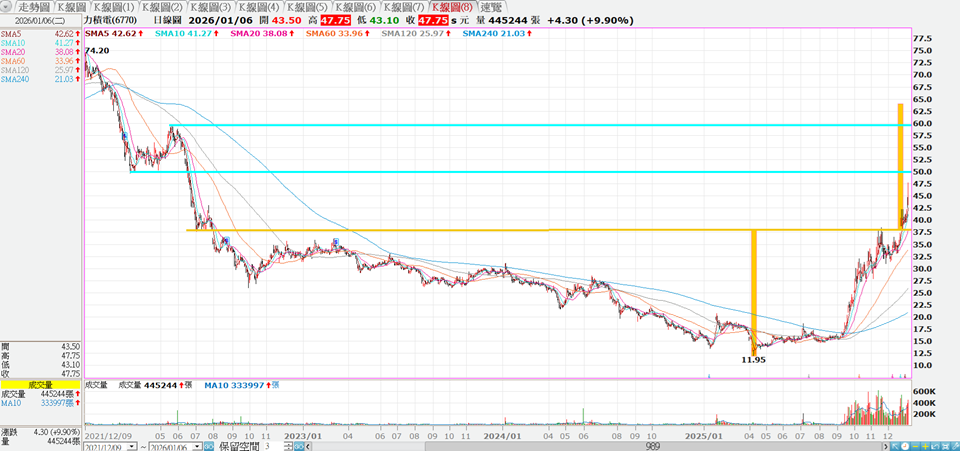  
* 瑞軒(2489)  
  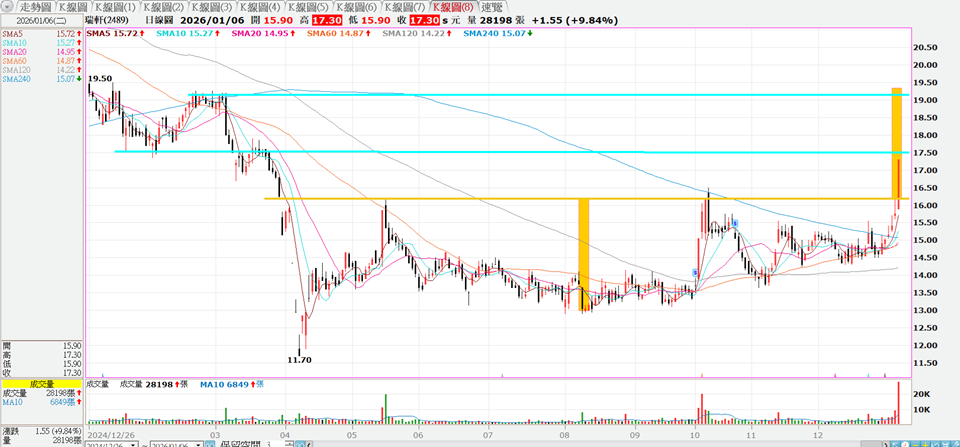  

### 個股解盤  

* 千興(2025)  
  看法：表現不強，回測頸線支撐。  

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'2025',buttom_pattern = True)

> **盤後**：底部反轉交易策略分析  

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-10-15'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-12-02']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-11-21'
    bottom_price = range_prices.loc['2025-11-21']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-02'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('2025','2025-08-28','2026-01-06',line_drawing_callback)
display(image)

籌碼面：  
法人○○( )：外資○○( )、投信○○( )、自營○○( )。  
主力○○( )。  
分公司買賣家數差○○( )。  
融資中立(0)、融券中立(0)。  